In [8]:
import numpy as np
import math
import CellModeller
import pandas as pd
#import cPickle
import os
import glob
#%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
import pickle

In [9]:
def my_logistic(t): #postive 
    return 100/(1+99*math.exp(-1.09*t))

In [67]:
def my_logistic(t): #negative
    return 100/(100/(1+99*math.exp(-1.09*t)))

In [127]:
def my_logistic_pos(t, max_exp, slope, lag): #postive 
    return max_exp/(1+lag*math.exp(-slope*t))

In [138]:
def my_logistic_neg(t, max_exp, slope, lag): #negitive
    return max_exp/(max_exp/(1+lag*math.exp(-slope*t)))

In [167]:
x = np.linspace(0, 10, 99)
y = [my_logistic_neg(i, 1, 0.409, 100) for i in x]
growth = pd.DataFrame({'Time':x, 'HctA':y})

In [136]:
x = np.linspace(0, 10, 99)
y = [my_logistic_pos(i, 100, 1.709, 900) for i in x]
growth = pd.DataFrame({'Time':x, 'HctA':y})

<AxesSubplot:xlabel='Time'>

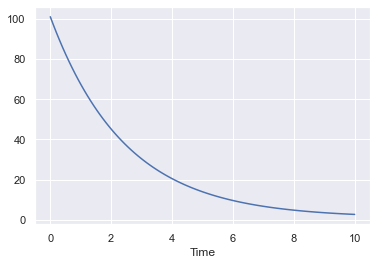

In [168]:
growth.plot(x='Time', y='HctA', legend=False)

In [135]:
class cell:
    rnaamt = [0.0,0.0,0.0,0.0,0.0] # RNA levels, used, in part, to drive geneamt levels #[0]= ectExp, [1]=Euo, [2]=HctA, [3]=CtcB, [4]=HctB
    geneamt = [0.0,0.0,0.0,0.0,0.0]   #[0]= ectExp, [1]=Euo, [2]=HctA, [3]=CtcB, [4]=HctB
    growthRate = 1

In [68]:
pr0 = 0.09 #RNA production rate of ectExp
nr0 = 0.05 #RNA degredation rate of ectExp
p0 = 2 #Protein production rate of ectExp
n0 = 0.5  #Protein degredation rate of ectExp

In [69]:
cell.rnaamt = [0.0,0.0,0.0,0.0,0.0] # RNA levels, used, in part, to drive geneamt levels #[0]= ectExp, [1]=Euo, [2]=HctA, [3]=CtcB, [4]=HctB
cell.geneamt = [0.0,0.0,0.0,0.0,0.0]
def ectopic(t):
    cell.rnaamt[0] = cell.rnaamt[0] + (pr0 * cell.growthRate) - (nr0 * cell.rnaamt[0]) # RNA of ectopic expressed protein
    cell.geneamt[0] = cell.geneamt[0] + (p0 * cell.rnaamt[0] * cell.growthRate) - (n0 * cell.geneamt[0]) #Ectopic expresed protein
    print(cell.geneamt[0])
    return cell.geneamt[0]

In [70]:
x = np.linspace(0, 10, 99)
y = [ectopic(i) for i in x]
growth = pd.DataFrame({'Time':x, 'HctA':y})

0.18
0.44099999999999995
0.7339499999999999
1.0347524999999997
1.3317648749999997
1.6195516312499996
1.8957615496874998
2.1595672222031252
2.4108857360929687
2.64998988678832
2.8773146111989036
3.0933609900139585
3.2986489952007605
3.493694572784472
3.678998857817123
3.8550434217622045
4.022288504092064
4.181172705596445
4.332113383671116
4.475507371164807
4.611731830945191
4.741145153567243
4.864087852973537
4.980883438867187
5.091839256194993
5.197247288020825
5.297384920937574
5.3925156735495925
5.4828898892015605
5.568745394406206
5.650308124518258
5.727792718208526
5.80140308225619
5.871332928122426
5.937766281705827
6.000877967615299
6.060834069231914
6.11779236576901
6.171902747479905
6.223307610105582
6.27214222960014
6.31853511812005
6.362608362214008
6.404477944103286
6.444254046898112
6.482041344553201
6.51793927732554
6.552042313459262
6.584440197786299
6.615218187896984
6.644457278502135
6.672234414577028
6.6986226938481765
6.7236915591557675
6.747506981197979
6.7701316321

<AxesSubplot:xlabel='Time'>

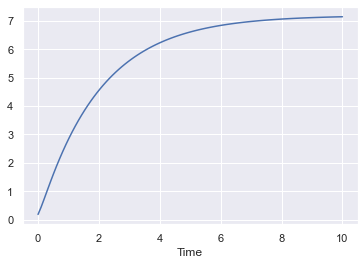

In [71]:
growth.plot(x='Time', y='HctA', legend=False)